In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

In [86]:
df_iron = pd.read_csv('../Dissertation_projects/Data/IRON/Iron.csv', sep=',', index_col=0)

#make all the spots labeled NA a nan value
df_iron = df_iron.replace('NA', np.nan)
df_iron = df_iron.replace('NA ', np.nan)

#make all BDL a 0 
df_iron.loc[df_iron['FeT_uM'] == 'BLD', 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] == 'BLD', 'Fe2_uM'] = 0

# convert columns to numeric data type
df_iron['FeT_uM'] = pd.to_numeric(df_iron['FeT_uM'], errors='coerce')
df_iron['Fe2_uM'] = pd.to_numeric(df_iron['Fe2_uM'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].where(pd.notna(df_iron['FeT_uM']), other=np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].where(pd.notna(df_iron['Fe2_uM']), other=np.nan)

#make all negative a 0 
df_iron.loc[df_iron['FeT_uM'] < 0, 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] < 0, 'Fe2_uM'] = 0

#calculate Fe +3 
df_iron['Fe3_uM'] = df_iron['FeT_uM'] - df_iron['Fe2_uM']
df_iron.loc[df_iron['Fe3_uM'] < 0, 'Fe3_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] > df_iron['FeT_uM'], 'Fe3_uM'] = 0
df_iron['Fe3_uM'] = pd.to_numeric(df_iron['Fe3_uM'], errors='coerce')
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].where(pd.notna(df_iron['Fe3_uM']), other=np.nan)

#time feild 
df_iron['Fe2_Time'] = pd.to_numeric(df_iron['Fe2_Time'], errors='coerce')
df_iron['Fe2_Time'] = df_iron['Fe2_Time'].where(pd.notna(df_iron['Fe2_Time']), other=np.nan)

#time feild 
df_iron['FeT_Time'] = pd.to_numeric(df_iron['FeT_Time'], errors='coerce')
df_iron['FeT_Time'] = df_iron['FeT_Time'].where(pd.notna(df_iron['FeT_Time']), other=np.nan)

# convert columns to numeric data type
df_iron['FeT_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')
df_iron['Fe2_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')

df_iron['code'] = df_iron['Location'] + '_' + df_iron['Campaign']

In [3]:
df_doc = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)

#make all BDL a 0 
df_doc.loc[df_doc['NPOC_uM'] == 'BLD', 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] == 'BLD', 'TN_uM'] = 0

df_doc.loc[df_doc['NPOC_uM'] < 0, 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] < 0, 'TN_uM'] = 0

#fix date time 
df_doc['date_time'] = pd.to_datetime(df_doc['Date'])
df_doc['Date'] = df_doc['date_time'].dt.date

df_doc['NPOC_uM'] = pd.to_numeric(df_doc['NPOC_uM'], errors='coerce')
df_doc['NPOC_uM'] = df_doc['NPOC_uM'].where(pd.notna(df_doc['NPOC_uM']), other=np.nan)

df_doc['TN_uM'] = pd.to_numeric(df_doc['TN_uM'], errors='coerce')
df_doc['TN_uM'] = df_doc['TN_uM'].where(pd.notna(df_doc['TN_uM']), other=np.nan)

df_doc['Time'] = pd.to_numeric(df_doc['Time'], errors='coerce')
df_doc['Time'] = df_doc['Time'].where(pd.notna(df_doc['Time']), other=np.nan)

df_doc['code'] = df_doc['Location'] + '_' + df_doc['Campaign']

In [4]:
df_meta = pd.read_csv('../Dissertation_projects/Data/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta['code'] = df_meta['Station'] + '_' + df_meta['Trip']

In [5]:
df_c = pd.read_csv('../Dissertation_projects/Data/CDOM/Outputs.csv', sep=',', index_col=0)

df_c['Sample_idx'] = df_c.index.astype(object)
df_meta['Sample_idx'] = df_meta.index.astype(object)

df_c.index = df_c['file_id']

df_cdom = df_c.merge(df_meta, on="Sample_idx", how="left")

df_cdom.index = df_cdom['Sample_idx']
df_cdom['Sample'] = df_cdom.index
df_cdom.index = df_cdom['Sample']
df_cdom = df_cdom.drop('Sample_idx', axis = 1)
df_meta = df_meta.drop('Sample_idx', axis = 1)

In [6]:
df_por = pd.read_csv('../Dissertation_projects/Data/Porosity/Porosity.csv', sep=',', index_col = 0)

df_por['code'] = df_por['Stn'] + '_' + df_por['camp']

In [7]:
df_hights = pd.read_csv('../Dissertation_projects/Data/Hights.csv', sep=',')

df_hights['code'] = df_hights['Stn'] + '_' + df_hights['Camp']
#df_hights.drop("Stn", axis=1, inplace=True)
#df_hights.drop("Camp", axis=1, inplace=True)
df_hights.index = df_hights['code']
df_hights.drop("code", axis=1, inplace=True)

In [11]:
df_spectra_bc = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_BC.csv',sep=',', index_col=0)
df_spectra_pw = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_PW.csv',sep=',', index_col=0)
df_spectra_wc = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_WC.csv',sep=',', index_col=0)
df_spectra_rz = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_RZ.csv',sep=',', index_col=0)

df_spectra_bc.columns = ['a' + col for col in df_spectra_bc.columns]
df_spectra_pw.columns = ['a' + col for col in df_spectra_pw.columns]
df_spectra_wc.columns = ['a' + col for col in df_spectra_wc.columns]
df_spectra_rz.columns = ['a' + col for col in df_spectra_rz.columns]

In [13]:
#get BC data sets 
df_cdom_bc = df_cdom[df_cdom['Type'] == 'LANDSYR']
df_iron_bc = df_iron[df_iron['Type'] == 'BC']
df_doc_bc = df_doc[df_doc['Type'] == 'BC']

#get PW data sets 
df_cdom_pw = df_cdom[df_cdom['Type'] == 'PW']
df_iron_pw = df_iron[df_iron['Type'] == 'PW']
df_doc_pw = df_doc[df_doc['Type'] == 'PW']

#get WC data sets 
df_cdom_wc = df_cdom[df_cdom['Type'] == 'NISK']
df_iron_wc = df_iron[df_iron['Type'] == 'WC']
df_doc_wc = df_doc[df_doc['Type'] == 'WC']

#get RHZ data 
df_cdom_rz = df_cdom[df_cdom['Type'] == 'RHZ']
df_iron_rz = df_iron[df_iron['Type'].isin(['RZ', 'GBRZ'])]
df_doc_rz = df_doc[df_doc['Type'] == 'RZ']

In [14]:
#Put all the BC data together 
#remove repeat rows 
df_cdom_bc_cl = df_cdom_bc.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged','file_id'], axis=1)
df_iron_bc_cl = df_iron_bc.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_bc = df_spectra_bc.join(df_doc_bc)
df_bc = df_bc.join(df_cdom_bc_cl)

#match up the inxdes for the merge 
df_iron_bc_cl['sample_index'] = df_iron_bc_cl.index.astype(str)
df_bc.index = df_bc.index.astype(str)

#combind the iron data 
df_bc = df_bc.join(df_iron_bc_cl)

#Put all the PW data together 
#remove repeat rows 
df_cdom_pw_cl = df_cdom_pw.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_pw_cl = df_iron_pw.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_pw = df_spectra_pw.join(df_doc_pw)
df_pw = df_pw.join(df_cdom_pw_cl)

#match up the inxdes for the merge 
df_iron_pw_cl['sample_index'] = df_iron_pw_cl.index.astype(str)
df_pw.index = df_pw.index.astype(str)

#combind the iron data 
df_pw = df_pw.join(df_iron_pw_cl)

#Put all the WC data together 
#remove repeat rows 
df_cdom_wc_cl = df_cdom_wc.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_wc_cl = df_iron_wc.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_wc = df_spectra_wc.join(df_doc_wc)
df_wc = df_wc.join(df_cdom_wc_cl)

#match up the inxdes for the merge 
df_iron_wc_cl['sample_index'] = df_iron_wc_cl.index.astype(str)
df_wc.index = df_wc.index.astype(str)

#combind the iron data 
df_wc = df_wc.join(df_iron_wc_cl)

#Put all the RZ data together 
#remove repeat rows 
df_cdom_rz_cl = df_cdom_rz.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_rz_cl = df_iron_rz.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_rz = df_spectra_rz.join(df_doc_rz)
df_rz = df_rz.join(df_cdom_rz_cl)

#match up the inxdes for the merge 
df_iron_rz_cl['sample_index'] = df_iron_rz_cl.index.astype(str)
df_rz.index = df_rz.index.astype(str)

#combind the iron data 
df_rz = df_rz.join(df_iron_rz_cl)


In [15]:
#litte clean ups with outliters 
df_pw.loc[df_pw['NPOC_uM'] > 5000, 'NPOC_uM'] = np.nan

df_bc.loc[df_bc['FeT_uM'] > 1, 'FeT_uM'] = np.nan
df_bc.loc[df_bc['Fe3_uM'] > 1, 'Fe3_uM'] = np.nan
df_bc.loc[df_bc['FeT_uM'] == 0, 'FeT_uM'] = np.nan
df_bc.loc[df_bc['Fe3_uM'] == 0, 'Fe3_uM'] = np.nan
df_bc.loc[df_bc['Fe2_uM'] == 0, 'Fe2_uM'] = np.nan

df_bc.loc[df_bc['a350'] > 2, 'a350'] = np.nan
df_bc.loc[df_bc['a412'] > 1.5, 'a412'] = np.nan
df_bc.loc[df_bc['NPOC_uM'] < .000005, 'NPOC_uM'] = np.nan
df_bc.loc[df_bc['TN_uM'] < .000005, 'TN_uM'] = np.nan

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\3051417319.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\3051417319.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\3051417319.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppD

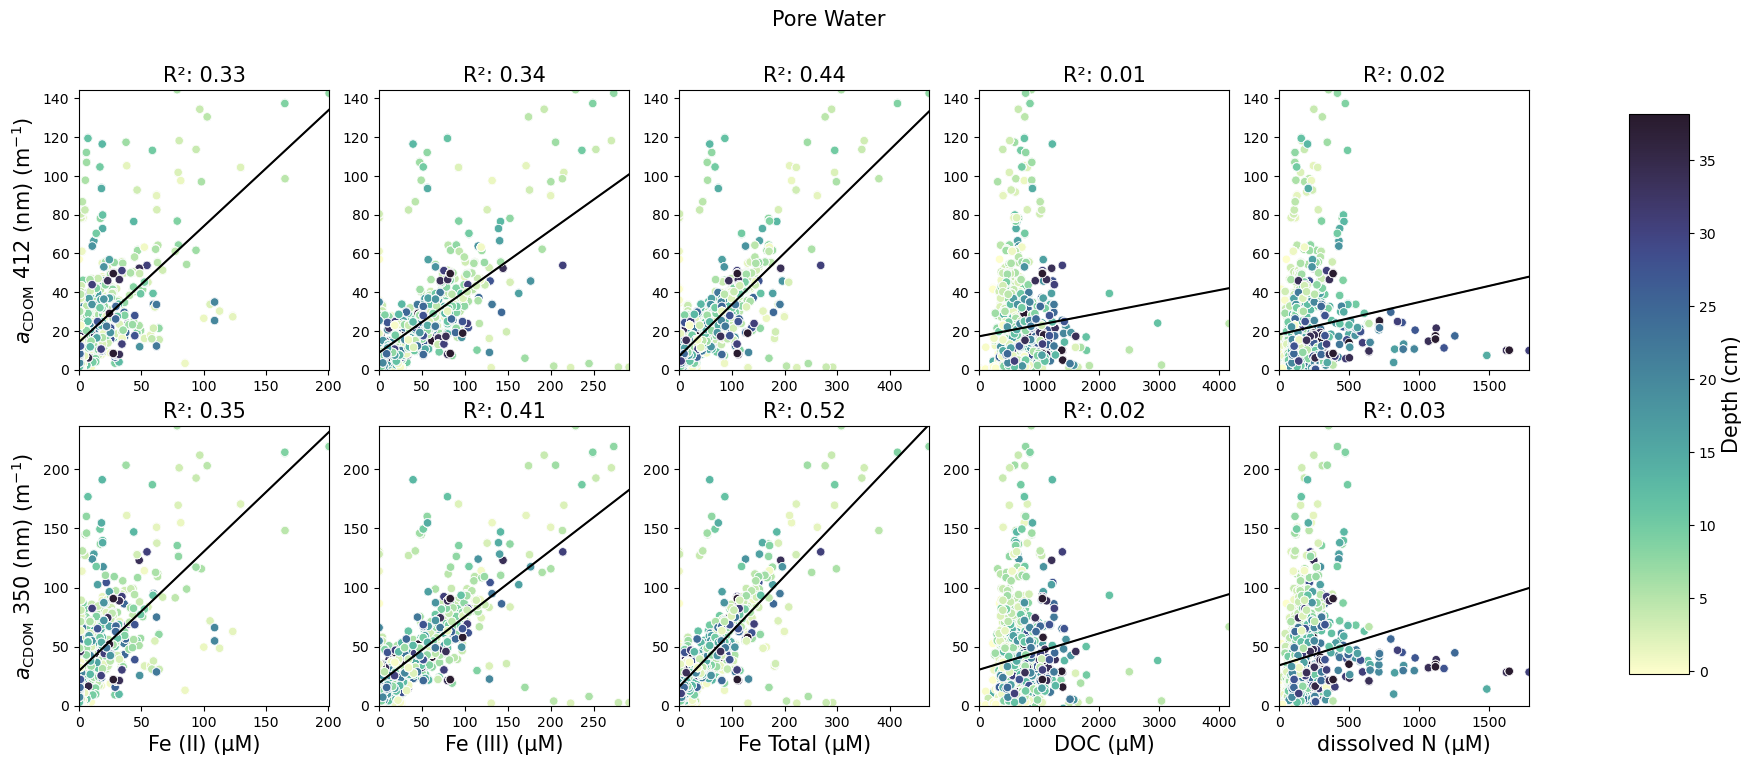

In [16]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = df_pw['Depth'].min()
vmax = df_pw['Depth'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_pw[[x_var, y_var, 'Depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Depth']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth (cm)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Pore Water', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/PW_CDOM.png")

plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\174925911.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\174925911.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\174925911.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData

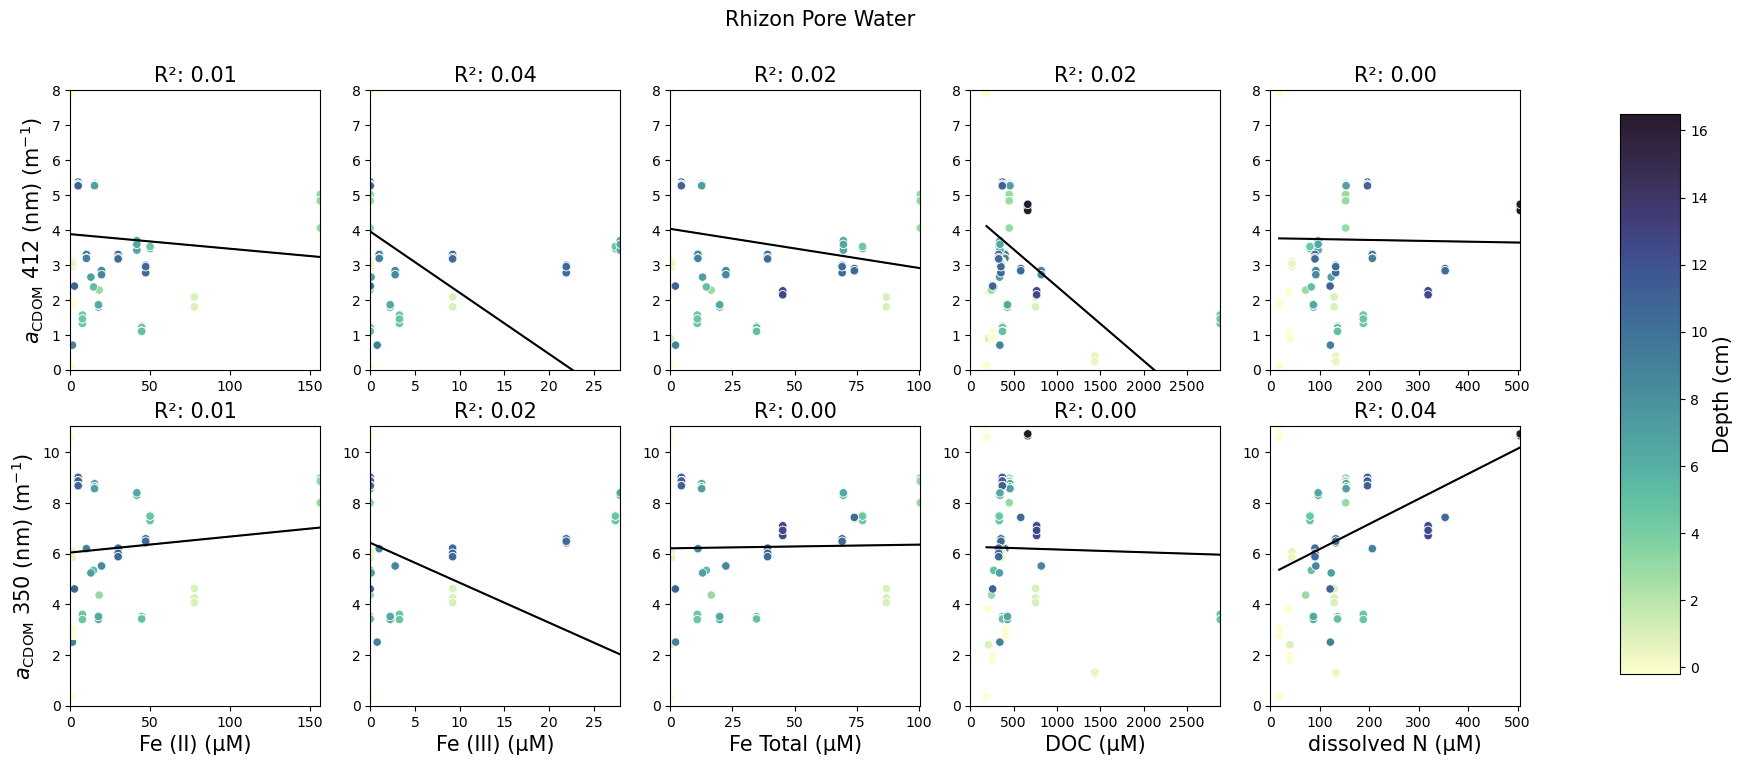

In [17]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = df_rz['Depth'].min()
vmax = df_rz['Depth'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_rz[[x_var, y_var, 'Depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Depth']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth (cm)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Rhizon Pore Water', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/RZ_CDOM.png")

plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\3996146681.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\3996146681.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\3996146681.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppD

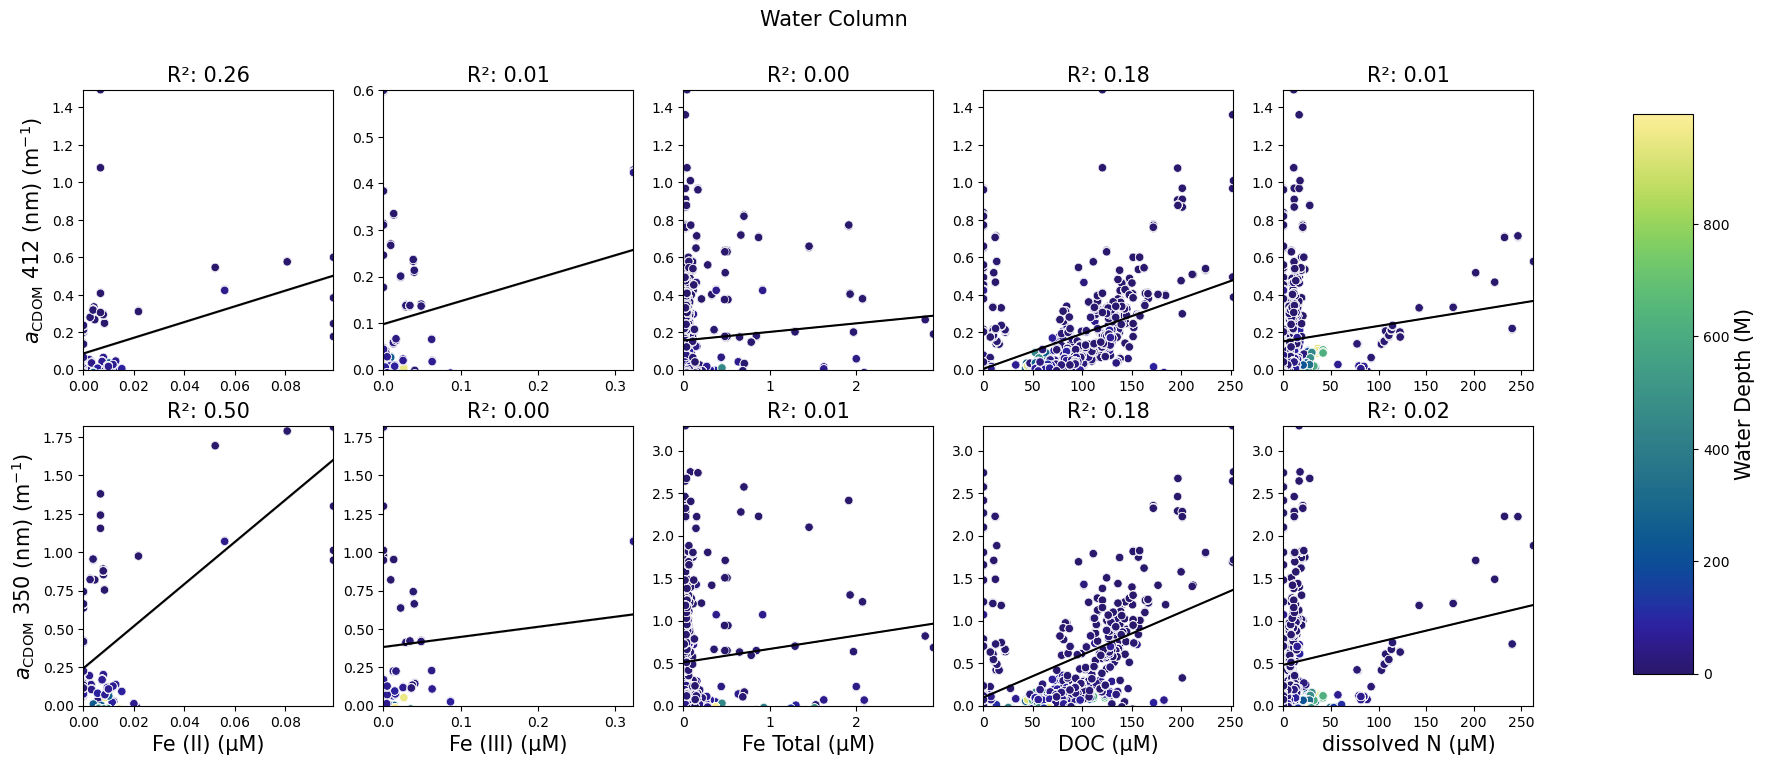

In [18]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = df_wc['Depth'].min()
vmax = df_wc['Depth'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_wc[[x_var, y_var, 'Depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Depth']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.haline, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.haline, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Water Depth (M)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Water Column', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/WC_CDOM.png")

plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\730591188.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\730591188.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_12988\730591188.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData

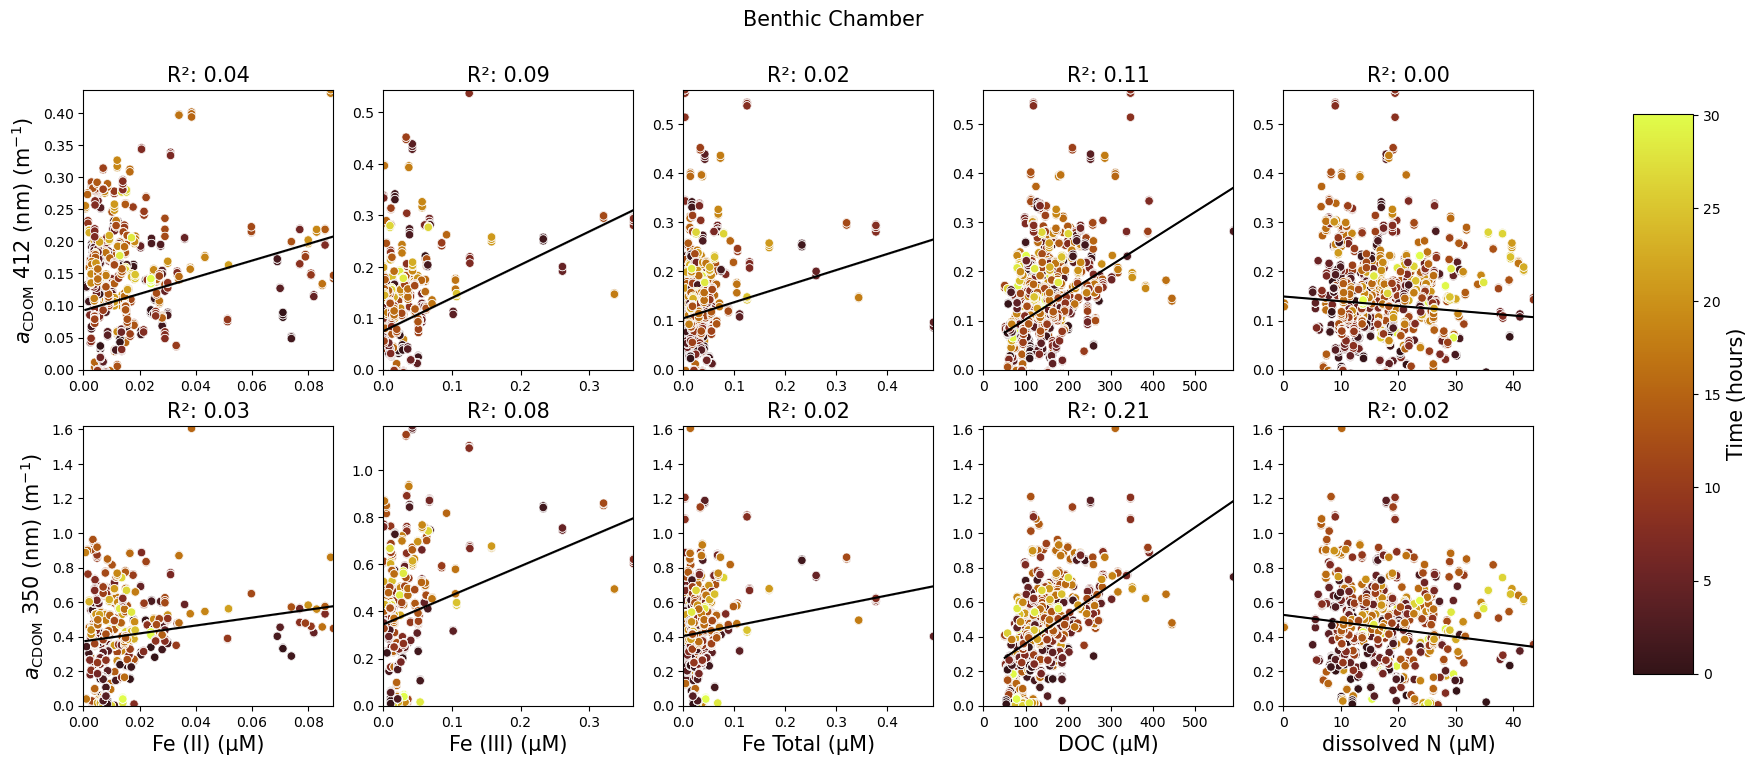

In [19]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = 0
vmax = df_bc['Time'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_bc[[x_var, y_var, 'Time']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Time']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.solar, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.solar, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Time (hours)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Benthic Chamber', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/BC_CDOM.png")

plt.show()

In [ ]:
##Part 2 Model CDOM

                            OLS Regression Results                            
Dep. Variable:                   a350   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     455.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          5.29e-253
Time:                        23:19:12   Log-Likelihood:                 697.12
No. Observations:                3843   AIC:                            -1386.
Df Residuals:                    3839   BIC:                            -1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1052      0.011      9.

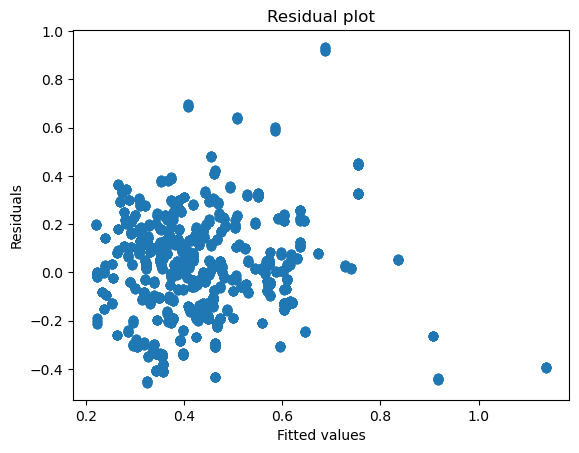

                    sum_sq      df           F         PR(>F)
Intercept         3.830721     1.0   93.942897   5.786026e-22
NPOC_uM          33.767521     1.0  828.099581  4.524626e-165
FeT_uM            1.312729     1.0   32.192770   1.499176e-08
NPOC_uM:FeT_uM    0.368849     1.0    9.045486   2.650518e-03
Residual        156.543387  3839.0         NaN            NaN


In [20]:
#Benthic chamber
# Define the model formula
#formula = 'a350 ~ NPOC_uM*TN_uM*FeT_uM' #.264
#formula = 'a350 ~ NPOC_uM*FeT_uM*TN_uM' #.264
#formula = 'a350 ~ NPOC_uM*TN_uM' #.239
#formula = 'a350 ~ NPOC_uM*Fe2_uM' #.228
#formula = 'a350 ~ NPOC_uM*Fe3_uM' #.259
formula = 'a350 ~ NPOC_uM*FeT_uM' #.262

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_bc).fit()

# Print the model summary
print(model.summary())

# Plot the residuals against the fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# Perform ANOVA
anova_results = anova_lm(model, typ=3)
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:                   a350   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     975.9
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:19:26   Log-Likelihood:                -32213.
No. Observations:                6752   AIC:                         6.444e+04
Df Residuals:                    6744   BIC:                         6.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.5273 

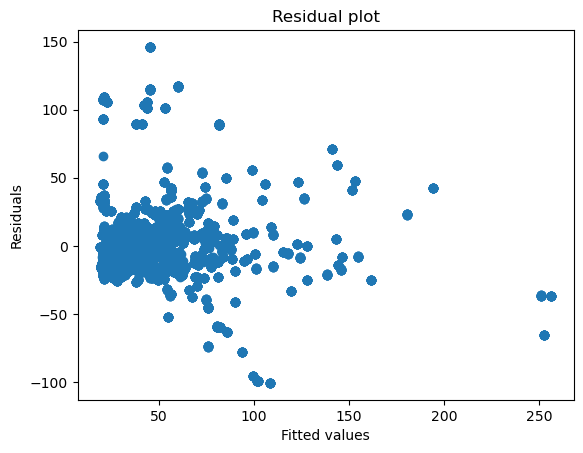

                            sum_sq      df           F         PR(>F)
Intercept             1.126342e+05     1.0  137.945051   1.517835e-31
Fe3_uM                2.090891e+04     1.0   25.607495   4.294812e-07
TN_uM                 5.604454e+03     1.0    6.863871   8.815288e-03
Fe3_uM:TN_uM          3.839981e+05     1.0  470.289049  7.258820e-101
NPOC_uM               1.020323e+03     1.0    1.249607   2.636674e-01
Fe3_uM:NPOC_uM        1.134674e+04     1.0   13.896544   1.947349e-04
TN_uM:NPOC_uM         4.320559e+03     1.0    5.291463   2.146059e-02
Fe3_uM:TN_uM:NPOC_uM  6.948554e+04     1.0   85.100132   3.724627e-20
Residual              5.506578e+06  6744.0         NaN            NaN


In [21]:
#Pore Water
# Define the model formula
formula = 'a350 ~ Fe3_uM+NPOC_uM' #.419 
formula = 'a350 ~ Fe3_uM' #.338 
formula = 'a350 ~ Fe3_uM+TN_uM' #.428 
formula = 'a350 ~ Fe3_uM*NPOC_uM' #.420 
formula = 'a350 ~ Fe3_uM*TN_uM' #.489 
formula = 'a350 ~ Fe3_uM+TN_uM*NPOC_uM' #.444
formula = 'a350 ~ Fe3_uM*TN_uM+NPOC_uM' #.490
formula = 'a350 ~ Fe3_uM*NPOC_uM+TN_uM' #.432
formula = 'a350 ~ Fe3_uM*TN_uM*NPOC_uM' #.503

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_pw).fit()

# Print the model summary
print(model.summary())

# Plot the residuals against the fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# Perform ANOVA
anova_results = anova_lm(model, typ=3)
print(anova_results)
